In [2]:
import os
import sys
sys.path.append('../utils')
sys.path.append('../dataset0')
from spot import DailyDataset, TOTAL_STD, TOTAL_MEAN
from tool import to_gpu
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

import types

%matplotlib inline

/home/xurenchao/install/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from gated_model import ResRNN as Model
# from gated_model import StackResRNN as Model
# from gated_model import GatedRNN as Model
# from gated_model import StackGatedRNN as Model

In [4]:
PATH = '../runs/electricity/'
run = 'Gated_2'
run = 'StackGated_3'
run = 'resrnn_3'

In [5]:
loader = DailyDataset.get_loader(batch_size=64, N=2000, W=14)

Data build range: [window(2010-06-27 00:00:00) - 2010-07-11 00:00:00, 2015-12-31 00:00:00]


In [6]:
trainX, trainY = loader.dataset.get_io('2012-01-01', '2015-12-31')
testX, testY = loader.dataset.get_io('2012-01-01', '2016-08-30')

In [7]:
with torch.no_grad():
    test_period_input = to_gpu(testX)
    self_test_input = to_gpu(testX[:trainX.size()[0] + 1])

In [18]:
model = to_gpu(Model(seq_dim=24, hidden_size=64))
model.load_state_dict(torch.load(os.path.join(PATH, run, 'snapshots11.pth')))

In [19]:
test_period_output= model.forecast(test_period_input)
# self_test_output = model.self_forecast(self_test_input, 243)

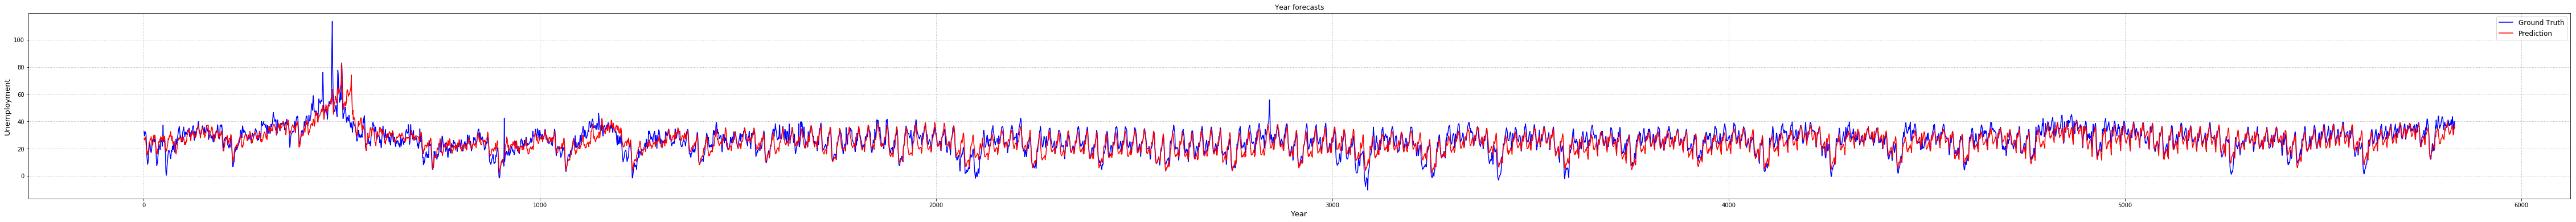

In [20]:
y_pred = torch.reshape(test_period_output[0].cpu(),(1717*24,)).detach().numpy() * TOTAL_STD + TOTAL_MEAN
y = torch.reshape(testY,(1717*24,)).numpy() * TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 243*24, 243*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-243*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-243*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

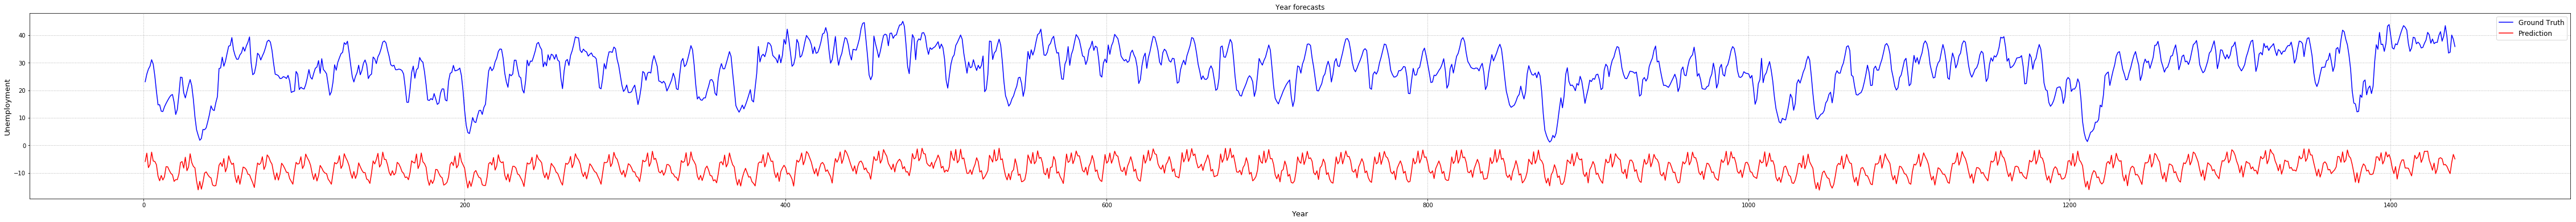

In [21]:
y_pred = torch.reshape(test_period_output[1].cpu(),(1717*24,)).detach().numpy()* TOTAL_STD
y = torch.reshape(testY,(1717*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 60*24, 60*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-60*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-60*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

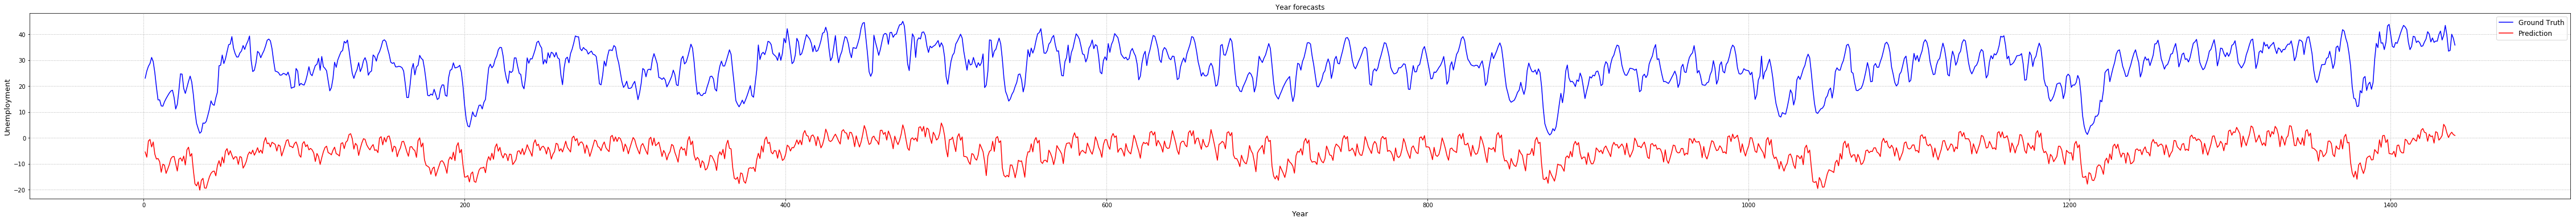

In [22]:
y_pred = torch.reshape(test_period_output[2].cpu(),(1717*24,)).detach().numpy()* TOTAL_STD
y = torch.reshape(testY,(1717*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 60*24, 60*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-60*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-60*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

In [12]:
y_pred = torch.reshape(test_period_output[3].cpu(),(1717*24,)).detach().numpy()* TOTAL_STD
y = torch.reshape(testY,(1717*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 243*24, 243*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-243*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-243*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

IndexError: tuple index out of range

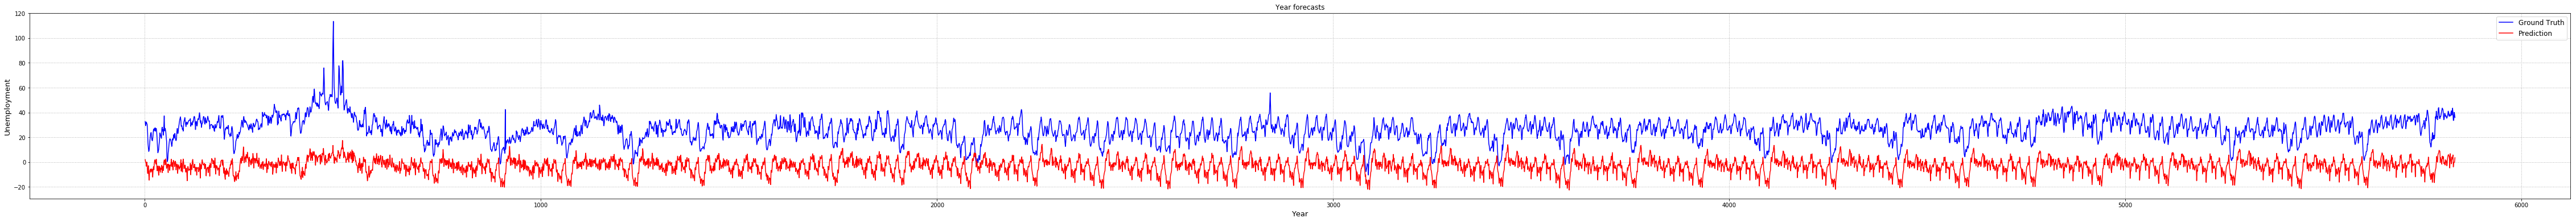

In [13]:
y_pred = torch.reshape(test_period_output[2].cpu()+test_period_output[3].cpu(),(1717*24,)).detach().numpy()* TOTAL_STD
y = torch.reshape(testY,(1717*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 243*24, 243*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-243*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-243*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Year forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Unemployment',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()

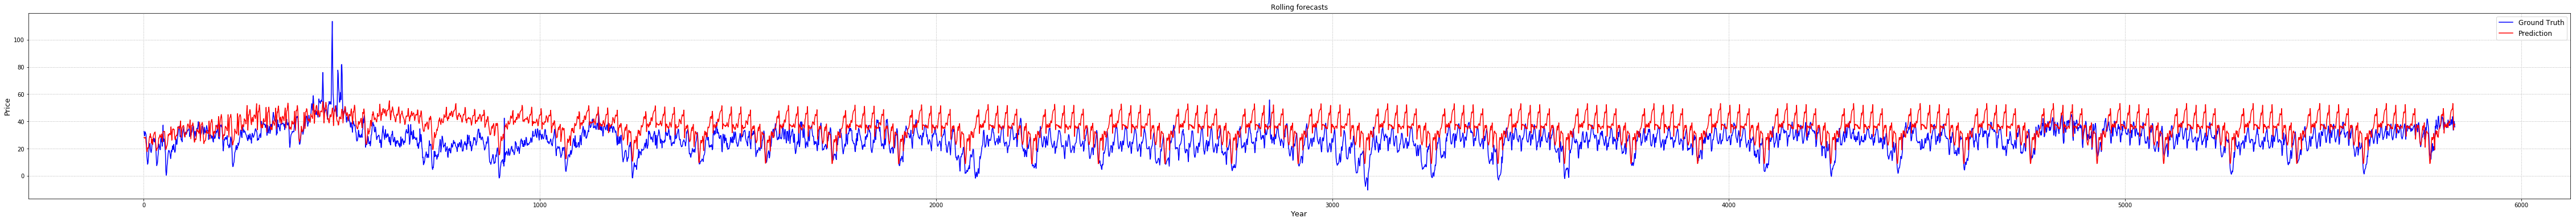

In [14]:
y_pred = torch.reshape(self_test_output.cpu(),(1717*24,)).detach().numpy()* TOTAL_STD + TOTAL_MEAN
y = torch.reshape(testY,(1717*24,)).numpy()* TOTAL_STD + TOTAL_MEAN
x=np.linspace(1, 243*24, 243*24)
plt.figure(figsize=(80,6))
plt.plot(x, y[-243*24:], color='blue', label='Ground Truth')
plt.plot(x, y_pred[-243*24:], color='red', label='Prediction')

# plt.xticks(x)
# plt.xlim(0,23)
plt.legend(fontsize='large') # 显示图例

plt.title('Rolling forecasts')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Price',fontsize=13)

plt.grid(linestyle=':', linewidth=1)
# plt.savefig('./figures/Hour.jpg',bbox_inches='tight', dpi=400)

plt.show()